In [1]:
from pylab import *  
import numpy as np

In [2]:
#--- precipitable water vapor (g/cm2)
uw = [0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0, 3.25, 3.5, 3.75, 4.0]

#--- surface skin temperature (K)
temps = [270, 275, 280, 285, 290, 295, 300]

#--- folder path
folder = 'figure/'

In [3]:
def read_sbdart_data(filename):
    f_raw = loadtxt(filename,delimiter="\t",skiprows=3,dtype='str')
    f = f_raw[::3]

    WL=[] #--- wavelength (um)
    FFV=[] #--- filter value
    TOPDN=[] #--- downwelling flux to the top of the atmosphere (TOA, W/cm2/um)
    TOPUP=[] #--- TOA upwelling flux
    TOPDIR=[] #--- TOA direct flux
    BOTDN=[] #--- downwelling flux at surface
    BOTUP=[] #--- upwelling flux at surface
    BOTDIR=[] #--- direct flux at surface

    for row in f:
        row = row[1:]
        row = row.replace('  ',' ')
        row = row.lstrip()
        split_row = row.split(' ')
        #print(split_row)
    
        WL.append(float(split_row[0]))
        FFV.append(float(split_row[1]))
        TOPDN.append(float(split_row[2]))
        TOPUP.append(float(split_row[3]))
        TOPDIR.append(float(split_row[4]))
        BOTDN.append(float(split_row[5]))
        BOTUP.append(float(split_row[6]))
        BOTDIR.append(float(split_row[7]))

    return TOPUP

In [4]:
flux_lw_290 = read_sbdart_data(folder+'11um_290')
flux_sw_290 = read_sbdart_data(folder+'39um_290')

In [5]:
flux_lw_290

[25.558,
 25.624,
 25.539,
 25.424,
 25.283,
 25.116,
 24.928,
 24.721,
 24.5,
 24.267,
 24.025,
 23.777,
 23.525,
 23.272,
 23.018,
 22.766,
 22.517]

In [6]:
flux_sw_290

[1.1167,
 1.1135,
 1.1106,
 1.1077,
 1.1047,
 1.1017,
 1.0987,
 1.0957,
 1.0926,
 1.0895,
 1.0863,
 1.0831,
 1.0799,
 1.0767,
 1.0734,
 1.0701,
 1.0667]

#### Calculate the brightness temperature difference: 

* sbdart gives the flux density in w/m2/micron
* this can be easily converted to brightness temperature ($T_B$) with an inversion of Planck's equation: 
    * $\lambda$: wavelength
    * $\Omega$: beam solid angle
    * $S$: flux density
 
$$
T_b = \frac{c_2}{\lambda \text{ ln}(\frac{c_1}{\lambda^5 S}+1)}
$$

In [7]:
c = 2.99792458e8 #m/s
h = 6.6260755e-34 #Js
k = 1.380658e-23 #J/K

c1 = 2e24*h*c*c
print('c1:', c1)
c2 = 1e6*h*c/k
print('c2:', c2)

c1: 119104393.40652297
c2: 14387.68660333391


In [8]:
wl = 11 #micron
S = 9.5734294 #W/m^2/sr/micron
T_b = c2 / (wl * np.log(c1/((wl**5) * S) + 1) )
print('T_b:', T_b)

T_b: 300.00000005078795


In [9]:
def flux_to_Tb(flux, wl):
    #--- Original constants used
    #c1 = 3.74e-22
    #c2 = 0.0144
    S = np.array(flux)/(np.pi) #W m-2 um-1
    
    T_b = c2/(wl*np.log(c1/((wl**5)*S)+1))
    
    return T_b

In [10]:
S = 9.5734294*np.pi #W/m^2/sr/micron
T_b = flux_to_Tb(S, 11)
print('T_b:', T_b)

T_b: 300.00000005078795


In [11]:
S = np.array(flux_sw_290) #W/m^2/sr/micron
T_b = flux_to_Tb(S, 3.9)
print('T_b:', T_b)

T_b: [287.65343866 287.58908832 287.53063584 287.47205438 287.41131647
 287.35043915 287.28942173 287.22826348 287.16491792 287.10142044
 287.03571443 286.96984478 286.90381059 286.83761095 286.76916832
 286.70054776 286.6296606 ]


In [12]:
data = {}

for t in temps:
    flux_lw = read_sbdart_data(folder+'11um_'+str(t))
    flux_sw = read_sbdart_data(folder+'39um_'+str(t))
    
    
    BTD = flux_to_Tb(flux_lw, 11) - flux_to_Tb(flux_sw, 3.9)

    for i in range(len(uw)):
        data[t, uw[i]] = BTD[i]

data

{(270, 0.0): 0.009707965056634293,
 (270, 0.25): 0.14801361422104264,
 (270, 0.5): 0.2680627786317018,
 (270, 0.75): 0.45627767391891894,
 (270, 1.0): 0.7027873544587919,
 (270, 1.25): 0.989222003502789,
 (270, 1.5): 1.2978122290942338,
 (270, 1.75): 1.6165183028380739,
 (270, 2.0): 1.9330736591639948,
 (270, 2.25): 2.2303641953899387,
 (270, 2.5): 2.5023672124613654,
 (270, 2.75): 2.7414335064011652,
 (270, 3.0): 2.944159724170504,
 (270, 3.25): 3.1058611188370264,
 (270, 3.5): 3.229296591592572,
 (270, 3.75): 3.315078967055399,
 (270, 4.0): 3.360092651691957,
 (275, 0.0): 0.5522226285789884,
 (275, 0.25): 0.7189233520064704,
 (275, 0.5): 0.7700217232743398,
 (275, 0.75): 0.8549014108898518,
 (275, 1.0): 0.9617443093273437,
 (275, 1.25): 1.0826373645206218,
 (275, 1.5): 1.2090183150474445,
 (275, 1.75): 1.3288557459782169,
 (275, 2.0): 1.4375499949240407,
 (275, 2.25): 1.528469408595015,
 (275, 2.5): 1.5938922869243015,
 (275, 2.75): 1.6314048981956262,
 (275, 3.0): 1.6428468271116685

In [13]:
x_values, y_values, values = zip(*[(x, y, value) for (x, y), value in data.items()])

In [14]:
btd_grid = np.array(values).reshape(len(temps), len(uw))
uw_grid, temp_grid = np.meshgrid(uw, temps)

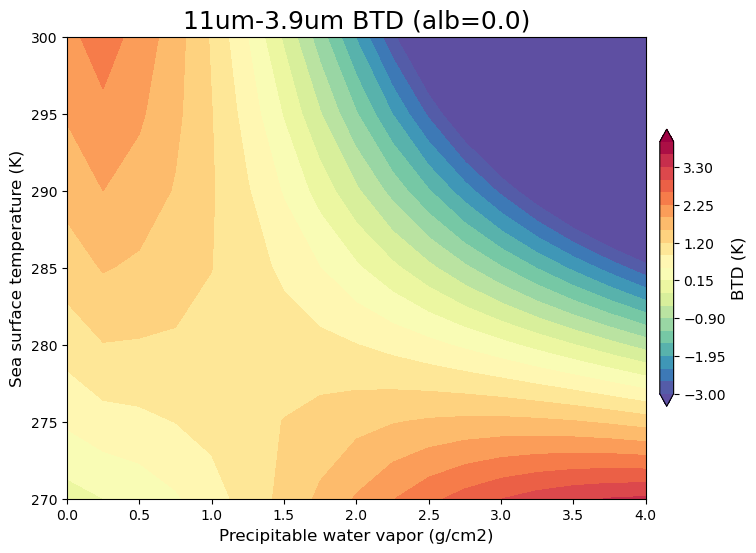

In [15]:
fig,ax=plt.subplots(1, figsize=(9,6))
cmap = plt.cm.Spectral_r
levels = np.linspace(-3, 4, 21)

c=ax.contourf(uw_grid, temp_grid, btd_grid, cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.6, pad=0.02, ax=ax)
ax.set_title('11um-3.9um BTD (alb=0.0)', fontsize=18)
ax.set_ylabel('Sea surface temperature (K)', fontsize=12)
ax.set_xlabel('Precipitable water vapor (g/cm2)', fontsize=12)
clb.set_label('BTD (K)', fontsize=12)
plt.savefig('sbdart_sst_wv.png', dpi=200, bbox_inches='tight')

Comparing brightness temperature in a dry atmosphere: 

In [16]:
S_sw = np.array(flux_sw_290) #W/m^2/sr/micron
T_b_sw = flux_to_Tb(S_sw, 3.9)
print('T_b (3.9um, 290 K, no moisture):', T_b_sw[0])

S_lw = np.array(flux_lw_290) #W/m^2/sr/micron
T_b_lw = flux_to_Tb(S_lw, 11)
print('T_b (3.9um, 290 K, no moisture):', T_b_lw[0])

T_b (3.9um, 290 K, no moisture): 287.6534386644598
T_b (3.9um, 290 K, no moisture): 289.3259317799428
